Program 3: Explore different activation functions and their effects on training. Implement different activation functions (e.g., Sigmoid, ReLU, Tanh). Train a neural network on the MNIST dataset using each activation function. Compare and visualize the training performance and accuracy.

Training model with sigmoid activation function...
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0191 - accuracy: 0.9971 - val_loss: 3.2567e-04 - val_accuracy: 1.0000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6397e-04 - accuracy: 1.0000 - val_loss: 7.5358e-05 - val_accuracy: 1.0000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.4764e-05 - accuracy: 1.0000 - val_loss: 2.4450e-05 - val_accuracy: 1.0000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5336e-05 - accuracy: 1.0000 - val_loss: 8.8609e-06 - val_accuracy: 1.0000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6780e-06 - accuracy: 1.0000 - val_loss: 3.3752e-06 - val_accuracy: 1.0000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1722e-06 - accuracy: 1.0000 - val_loss: 1.3371e-06 - val_accuracy: 1.0000
Epoch 7/10
1875/1875 [===================

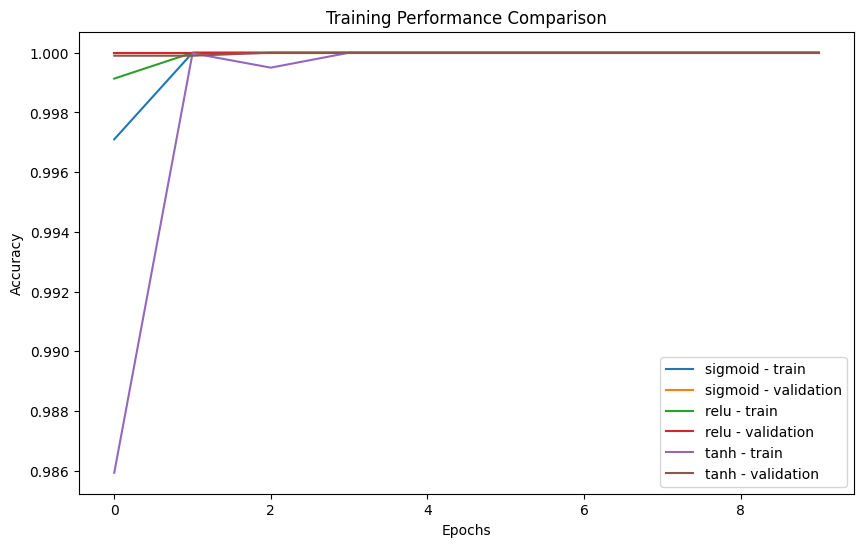

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
train_data = pd.read_csv(r"D:\Desktop\DL_Lab_Datasets-20250605T044016Z-1-001\DL_Lab_Datasets\MNIST\mnist_train.csv")
test_data = pd.read_csv(r"D:\Desktop\DL_Lab_Datasets-20250605T044016Z-1-001\DL_Lab_Datasets\MNIST\mnist_test.csv")

# Separate features and labels
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Define the model creation function
def create_model(activation_function):
    model = Sequential([
        Dense(128, input_shape=(X_train.shape[1],), activation=activation_function),
        Dense(64, activation=activation_function),
        Dense(10, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and store results for each activation function
activation_functions = ['sigmoid', 'relu', 'tanh']
results = {}

for activation in activation_functions:
    print(f"Training model with {activation} activation function...")
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    results[activation] = history

# Visualize the performance of different activation functions
plt.figure(figsize=(10, 6))

for activation in activation_functions:
    history = results[activation]
    plt.plot(history.history['accuracy'], label=f'{activation} - train')
    plt.plot(history.history['val_accuracy'], label=f'{activation} - validation')

plt.title('Training Performance Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


